<a href="https://colab.research.google.com/github/ManuelBagasina/DATCapstone/blob/Jhee/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install asyncpraw

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 7.3 MB/s eta 0:00:00


In [2]:
#Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Yahoo Finance
import yfinance as yf

# Firm Selection

In [3]:
#Select the frim for the prediction
firm = "AAPL"

# Apple -> AAPL
# Microsoft -> MSFT
# Nvidia -> NVDA
# Adobe -> ADVE
# Tesla -> TSLA
# Amazon -> AMZN
# Netflix -> NFLX
# Meta -> META
# Alphabet -> GOOGL

In [4]:
!pip install yfinance==0.2.54
!pip install requests-cache

import requests_cache
session = requests_cache.CachedSession(cache_name='yfinance_cache', backend='sqlite', expire_after=3600)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.7 MB/s eta 0:00:00


In [5]:
print(firm)

AAPL


In [6]:
# Get the firm's full name
def get_firm_name(ticker):
    stock = yf.Ticker(ticker)
    return stock.info["longName"]  # return Full name

firm_name = get_firm_name(firm)
print(firm_name)  # Full name

Apple Inc.


# Data Collection

### Stock Price

In [7]:
# Fetch data for a single stock
ticker = firm
stock = yf.Ticker(ticker)

# Get historical data
data = stock.history(period="5y") #I just set the period 5 years since yahoo finance api offers free microeconomic data about past 5 years

# Convert to Dataframe
df_stock = pd.DataFrame(data)

# Display
df_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-02-21 00:00:00-05:00,77.322389,77.766496,75.351836,75.970665,129554000,0.0,0.0
2020-02-24 00:00:00-05:00,72.138754,73.818089,70.190042,72.362015,222195200,0.0,0.0
2020-02-25 00:00:00-05:00,73.034274,73.417704,69.437768,69.910988,230673600,0.0,0.0
2020-02-26 00:00:00-05:00,69.534825,72.289234,69.527545,71.020020,198054800,0.0,0.0
2020-02-27 00:00:00-05:00,68.217059,69.406184,66.241649,66.377548,320605600,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.0,0.0
2025-02-18 00:00:00-05:00,244.149994,245.179993,241.839996,244.470001,48822500,0.0,0.0
2025-02-19 00:00:00-05:00,244.660004,246.009995,243.160004,244.869995,32204200,0.0,0.0


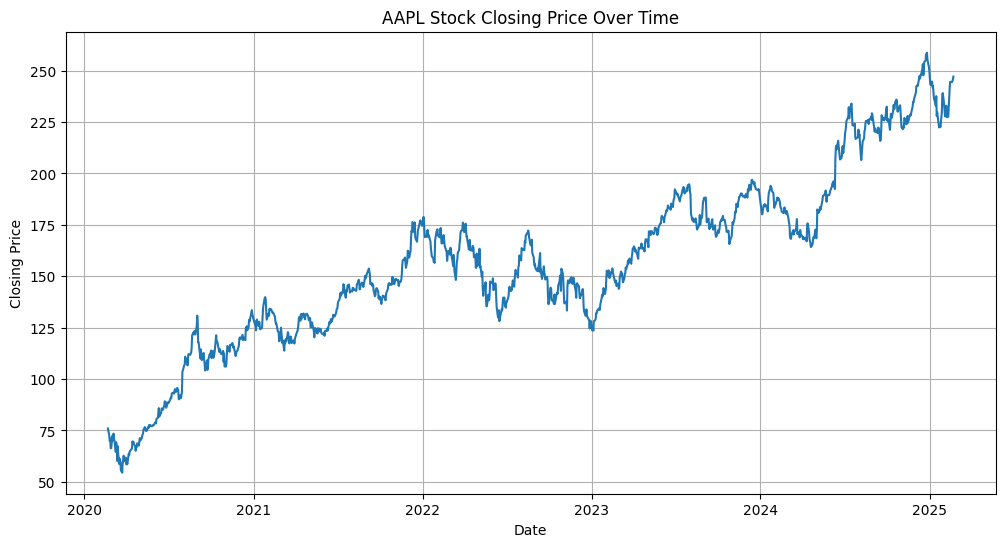

In [8]:
# Plot the closing price
plt.figure(figsize=(12, 6))
plt.plot(df_stock['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title(f'{firm} Stock Closing Price Over Time')
plt.grid(True)
plt.show()


### Macroeconomic Indicators

In [9]:
!pip install fredapi

In [10]:
from fredapi import Fred

# API key is from https://fred.stlouisfed.org
api_key = "d6ed01a1d424d730c0a92819f41f4c79"
fred = Fred(api_key=api_key)

# Macroeconomic Indicators and Their FRED Codes
# Indicators can be added or revised
indicators = {
    "GDP (Billions USD)": "GDP",
    "Unemployment Rate (%)": "UNRATE",
    "Producer Price Index (PPI)": "PPIACO",
    "Retail Sales (Millions USD)": "RSAFS",
    "Industrial Production Index": "INDPRO",
    "Housing Starts (Thousands)": "HOUST",
    "Personal Consumption Expenditures (PCE)": "PCE",
    "Trade Balance (Billions USD)": "BOPGSTB",
    "M2 Money Supply (Billions USD)": "M2",
    "Consumer Confidence Index": "UMCSENT",
}

# Fetch Data for Each Indicator
data = {}
for name, code in indicators.items():
    data[name] = fred.get_series(code)

# Convert to DataFrame
df_macro = pd.DataFrame(data)

# Display the data
df_macro


,GDP (Billions USD),Unemployment Rate (%),Producer Price Index (PPI),Retail Sales (Millions USD),Industrial Production Index,Housing Starts (Thousands),Personal Consumption Expenditures (PCE),Trade Balance (Billions USD),M2 Money Supply (Billions USD),Consumer Confidence Index
1913-01-01,NaN,NaN,12.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-02-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-03-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-04-01,NaN,NaN,12.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1913-05-01,NaN,NaN,11.900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-09-01,NaN,4.1,252.682,716388.0,102.5873,1355.0,20044.1,-84333.0,NaN,70.1
2024-10-01,29700.58,4.1,253.081,720393.0,102.1219,1344.0,20134.5,-74153.0,NaN,70.5
2024-11-01,NaN,4.2,253.229,725079.0,101.9736,1305.0,20253.6,-78940.0,NaN,71.8
2024-12-01,NaN,4.1,253.590,730300.0,102.9833,1515.0,20387.2,-98431.0,NaN,74.0


### Microeconomic Indicators

In [11]:
# Fetch company data
stock = yf.Ticker(firm)

# Fetch Financial Statements
financials = stock.financials.T  # Income Statement (Revenue, Profit, Margins)
balance_sheet = stock.balance_sheet.T  # Assets, Liabilities, Equity
cash_flow = stock.cashflow.T  # Cash from Operations, Investments, Financing

# Convert to DataFrame
df_financials = pd.DataFrame(financials)
df_balance_sheet = pd.DataFrame(balance_sheet)
df_cash_flow = pd.DataFrame(cash_flow)

df_micro = pd.concat([df_financials, df_balance_sheet, df_cash_flow], axis=1)
df_micro

,Tax Effect Of Unusual Items,Tax Rate For Calcs,Normalized EBITDA,Net Income From Continuing Operation Net Minority Interest,Reconciled Depreciation,Reconciled Cost Of Revenue,EBITDA,EBIT,Net Interest Income,Interest Expense,...,Change In Inventory,Change In Receivables,Changes In Account Receivables,Other Non Cash Items,Stock Based Compensation,Deferred Tax,Deferred Income Tax,Depreciation Amortization Depletion,Depreciation And Amortization,Net Income From Continuing Operations
2024-09-30,0.0,0.241,134661000000.0,93736000000.0,11445000000.0,210352000000.0,134661000000.0,123216000000.0,NaN,NaN,...,-1046000000.0,-5144000000.0,-3788000000.0,-2266000000.0,11688000000.0,NaN,NaN,11445000000.0,11445000000.0,93736000000.0
2023-09-30,0.0,0.147,125820000000.0,96995000000.0,11519000000.0,214137000000.0,125820000000.0,114301000000.0,-183000000.0,3933000000.0,...,-1618000000.0,-417000000.0,-1688000000.0,-2227000000.0,10833000000.0,NaN,NaN,11519000000.0,11519000000.0,96995000000.0
2022-09-30,0.0,0.162,130541000000.0,99803000000.0,11104000000.0,223546000000.0,130541000000.0,119437000000.0,-106000000.0,2931000000.0,...,1484000000.0,-9343000000.0,-1823000000.0,1006000000.0,9038000000.0,895000000.0,895000000.0,11104000000.0,11104000000.0,99803000000.0
2021-09-30,0.0,0.133,123136000000.0,94680000000.0,11284000000.0,212981000000.0,123136000000.0,111852000000.0,198000000.0,2645000000.0,...,-2642000000.0,-14028000000.0,-10125000000.0,-4921000000.0,7906000000.0,-4774000000.0,-4774000000.0,11284000000.0,11284000000.0,94680000000.0
2020-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,890000000.0,2873000000.0,...,NaN,NaN,NaN,NaN,NaN,-215000000.0,-215000000.0,NaN,NaN,NaN


In [12]:
df_micro.columns.tolist() #We can choose the moste relevent indicators

['Tax Effect Of Unusual Items',
 'Tax Rate For Calcs',
 'Normalized EBITDA',
 'Net Income From Continuing Operation Net Minority Interest',
 'Reconciled Depreciation',
 'Reconciled Cost Of Revenue',
 'EBITDA',
 'EBIT',
 'Net Interest Income',
 'Interest Expense',
 'Interest Income',
 'Normalized Income',
 'Net Income From Continuing And Discontinued Operation',
 'Total Expenses',
 'Total Operating Income As Reported',
 'Diluted Average Shares',
 'Basic Average Shares',
 'Diluted EPS',
 'Basic EPS',
 'Diluted NI Availto Com Stockholders',
 'Net Income Common Stockholders',
 'Net Income',
 'Net Income Including Noncontrolling Interests',
 'Net Income Continuous Operations',
 'Tax Provision',
 'Pretax Income',
 'Other Income Expense',
 'Other Non Operating Income Expenses',
 'Net Non Operating Interest Income Expense',
 'Interest Expense Non Operating',
 'Interest Income Non Operating',
 'Operating Income',
 'Operating Expense',
 'Research And Development',
 'Selling General And Administr

### Sentiment Analysis

##### yhfinance web scrapping

In [13]:
#Yahoo Finance web scrapping initialization
import requests
from bs4 import BeautifulSoup

url = f"https://finance.yahoo.com/quote/{firm}/news"

headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# print(soup.prettify())

In [14]:
# Find Articles Title
articles_title = soup.find_all("h3", class_="clamp")

# Find Posted times
articles_time = soup.find_all(class_="publishing yf-1weyqlp")

# Find Articles Summaries
articles_summary = soup.find_all("p", class_="yf-82qtw3")

# Make list for titles
article_title_list = []
for article_title in articles_title:
    article_title_list.append(article_title.text)

# Make list for times
article_time_list = []
for article_time in articles_time:
    article_time_list.append(article_time.text.split("•")[1].strip())

# Make list for summaries
article_summary_list = []
for article_summary in articles_summary:
    article_summary_list.append(article_summary.text)

#Dataframe
yh_article_titles_df = pd.DataFrame({"Time": article_time_list, "Title": article_title_list, "Summary": article_summary_list})

yh_article_titles_df

,Time,Title,Summary
0,1 hour ago,"As the Mag 7 lags, Which sectors are sending t...",The Magnificent Seven — made up of tech stocks...
1,5 hours ago,Bubbly valuations on 'Magnificent 7' stocks li...,Getting exposure to the Magnificent 7 won't co...
2,22 hours ago,Alibaba stock surges as Chinese tech giant tou...,Alibaba stock surged Thursday after the compan...
3,51 minutes ago,iPhone 16e – A testbed for Apple’s C1 cellular...,The $599 iPhone 16e comes with Apple’s own cel...
4,1 hour ago,"Magnificent Seven Stocks: Nvidia, Tesla Sell Off","Dubbed the Magnificent Seven stocks, Apple, Mi..."
5,1 hour ago,Apple Pulls Advanced Data Protection Service i...,The service will no longer be available to new...
6,2 hours ago,Government has made UK user data ‘less secure’...,Cybersecurity experts say the tech giant’s dec...
7,1 hour ago,Trump Says Cook Shifting Apple Manufacturing F...,(Bloomberg) -- President Donald Trump told a g...
8,2 hours ago,Apple Pulls Cloud Encryption Feature in UK Ove...,Apple disables its end-to-end encryption featu...
9,2 hours ago,Apple pulls data protection tool from UK after...,The tech giant confirmed it was removing its A...


02.10 Ri-on: I successfully set up a system to search for articles related to a specified company and extract the title, posting time, and summary in the yahoo finance website. However, the scraping currently only captures the articles displayed at the top of the webpage. To retrieve older data, further improvements are needed.

##### Reddit seb scrapping

In [ ]:
import asyncpraw
import asyncio
import nest_asyncio
import datetime
import random
import time

nest_asyncio.apply()  # Prevent async loop errors

# Stock-related keywords
# Relevant stock market subreddits
stock_subreddits = ["stocks"]

# Reddit API Function to Get 5 Random Posts Per Day for the Past 180 Days
async def fetch_stock_news_past_180_days():
    reddit = asyncpraw.Reddit(
        client_id="ardOQiL60Y2K7KF0V_WMGA",
        client_secret="oyNdfuaDlVeSwV7qmgSRP5bFcYru-Q",
        user_agent="my_reddit_scraper"
    )

    today = datetime.datetime.utcnow()
    start_date = today - datetime.timedelta(days=180)  # Start 180 days ago, includes today

    data = []

    print(f" Fetching data from {start_date.strftime('%Y-%m-%d')} to {today.strftime('%Y-%m-%d')}...")

    for firm_name in [firm]:  # Iterate over each company
        total_found = 0

        for day_offset in range(180):  # Loop through the past 180 days
            search_date = start_date + datetime.timedelta(days=day_offset)
            next_day = search_date + datetime.timedelta(days=1)

            for subreddit_name in stock_subreddits:
                print(f" Fetching {firm_name} posts from r/{subreddit_name} on {search_date.strftime('%Y-%m-%d')}...")

                try:
                    subreddit_obj = await reddit.subreddit(subreddit_name)
                except Exception as e:
                    print(f" Error accessing subreddit {subreddit_name}: {e}")
                    continue  # Skip to the next subreddit if an error occurs

                found_posts = []

                async for post in subreddit_obj.search(
                    query=firm_name,
                    sort="relevance",
                    time_filter="year",  # Searching across a year but filtering manually
                    limit=100
                ):
                    if not post or not post.title:  # Handle cases where API returns None
                        continue

                    post_date = datetime.datetime.utcfromtimestamp(post.created_utc)

                    # Ensure the post belongs to the correct day
                    if search_date.date() <= post_date.date() < next_day.date():
                        found_posts.append({
                            "Company": firm_name,
                            "Subreddit": subreddit_name,
                            "Title": post.title,
                            "Score": post.score,
                            "URL": post.url.strip(),
                            "Date": post_date.strftime('%Y-%m-%d'),
                            "Content": post.selftext[:300]  # Limit content to 300 characters
                        })

                await asyncio.sleep(1.5)  # Prevent rate-limiting

                # Ensure we don't sample more than the available number of posts
                if len(found_posts) > 5:
                    found_posts = random.sample(found_posts, 5)  # Select 5 at random
                elif len(found_posts) > 0:
                    found_posts = found_posts  # Take all available posts
                else:
                    continue  # Skip if no posts were found

                data.extend(found_posts)
                total_found += len(found_posts)

        print(f" {firm_name}: Total collected over 180 days = {total_found} posts\n")

    await reddit.close()
    df = pd.DataFrame(data)

    if df.empty:
        print(" No data was collected for the past 180 days. Check API request & filters.")
    else:
        print("\n Data Summary:")
        print(df["Company"].value_counts())
        print(df["Date"].value_counts())
        print(df.sample(min(10, len(df))))  # Show up to 10 random samples

    return df

# Execution
if __name__ == "__main__":
    asyncio.run(fetch_stock_news_past_180_days())


02.10 Ri-on: Added draft for web scrapping reddit posts

##### Data Merging (Sentiment Analysis)

##### Text Quantification

### Data Merging

# EDA

# Feature Engineering

# Modeling

# Evaluation